<a href="https://colab.research.google.com/github/Beginner98/mtvs-AI/blob/main/Torchvision_DataLoader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dataset and Dataloader
20220910<br>
10:04am<br>
<https://tutorials.pytorch.kr/beginner/basics/data_tutorial.html>

In [19]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

training_data = datasets.FashionMNIST(root='data',    # 학습 데이터가 저장되는 경로
                                      train=True,     # 학습용 데이터셋 여부 지정
                                      download=True,  # 데이터가 없는 경우 인터넷에서 다운로드
                                      transform=ToTensor() # feature과 label transform을 지정
)
test_data = datasets.FashionMNIST(root='data',       # 테스트 데이터가 저장되는 경로 
                                  train=False,        # 학습용 데이터 여부
                                  download=True,
                                  transform=ToTensor()

)

In [20]:
print(type(training_data))
print(type(test_data))

<class 'torchvision.datasets.mnist.FashionMNIST'>
<class 'torchvision.datasets.mnist.FashionMNIST'>


In [21]:
print(training_data)
print(test_data)

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()
Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()


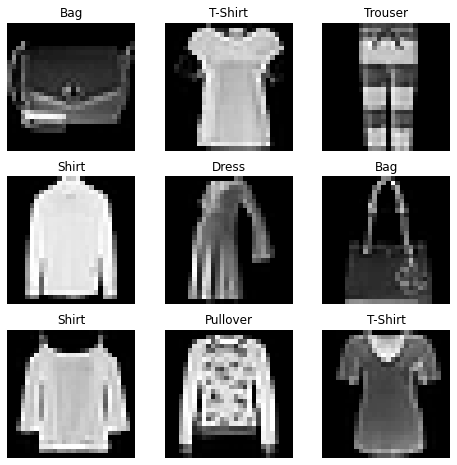

In [71]:
### Dataset을 순회하고 시각화하기
labels_map = {
    0:'T-Shirt',
     1: 'Trouser',
     2:'Pullover',
     3:'Dress',
     4:'Coat',
     5: 'Sandal',
     6: 'Shirt',
     7:'Sneaker',
     8: 'Bag',
     9: 'Ankle boot'
}

figure = plt.figure(figsize = (8, 8))           # 출력 사이즈 정하기
cols, rows = 3, 3                                  
for i in range(1, cols * rows + 1):
  # print(i)
  # traindata의 사이즈 중 하나를 골라서 텐서의 내용 출력(인덱스 고르기)
  simple_idx = torch.randint(len(training_data), size = (1, )).item()
  # simple_idx = torch.randint(len(training_data), size = (1, ))
  # print(simple_idx.item())
  img, label = training_data[simple_idx]  # 이미지와 라벨이 반환됨
  figure.add_subplot(rows, cols, i)       # 3 * 3 의 사이즈 중 순서대로 출력
  plt.title(labels_map[label])            # 위에서 받은 라벨의 결과값을 title
  plt.axis('off')                         # 축 출력 안함
  # print(img.shape)
  # print(img.squeeze().shape)
  plt.imshow(img.squeeze(), cmap='gray')
plt.show()



In [46]:
import torch
a = torch.randint(100, size = (1, 5))
print(a)
b = torch.randint(20, size = (1, ))
print(b)
# print(a.item())  한개의 텐서 요소만 파이썬 스칼라로 변환 가능
print(b.item())

tensor([[82, 76, 25, 71, 44]])
tensor([6])
6


In [64]:
# np.sqeeze()
# https://jimmy-ai.tistory.com/101
import numpy as np
import  sys

a = np.array([[[1, 2, 3],
               [4, 5, 6],
               [7, 8, 9]]])
print(a)
print(a.shape)
print('=========')


a = a.squeeze()
print(a)
print(a.shape)
print('=========')

b = np.array([[[[1,2,3]],
                [[4,5,6]],
                [[7,8,9]]]])
print(b.shape)
print('=========')
b = b.squeeze()
print(b)
print(b.shape)


[[[1 2 3]
  [4 5 6]
  [7 8 9]]]
(1, 3, 3)
[[1 2 3]
 [4 5 6]
 [7 8 9]]
(3, 3)
(1, 3, 1, 3)
[[1 2 3]
 [4 5 6]
 [7 8 9]]
(3, 3)


## 파일에서 사용자 정의 데이터셋 만들기
사용자 정의 Dataset 클래스는 반드시 3개 함수를 구현해야 함: ***__init__***, ***__len__***, 그리고 ***__getitem__***.

In [23]:
# 파일에서 사용자 정의 데이터셋 만들기
import os
import pandas as pd
from torchvision.io import read_image


class CustomImageDataset(Dataset):
  # init 함수는 객체가 실행 될 때 한 번만 실행됨. 이미지와 주석 파일(ann)
  def __init__(self, annotaions_file, img_dir, transform=None, target_transform=None):
    self.image_labels = pd.read_csv(annotaions_file, names = ['file_name', 'label'])
    self.img_dir = img_dir,
    self.transform = transform,
    self.target_transform = target_transform


  # 데이터셋의 샘플 개수를 반환
  def __len__(self):
    return len(self.img_labels)


  # 주어진 idx에 해당하는 샘플을 데이터셋에서 불러오고 반환, 
  # 인덱스를 기반으로, 디스크에서 이미지와 위치를 식별하고,  read_image를 사용하여 이미지를 텐서로 변환
  # self.img_labels의 csv데이터로부터 해당하는 정답(label)을 가져오고, transform 함수들을 호출한 뒤,
  # 텐서 이미지와 라벨을 dictionary 형으로 변환
  def __getitem__(self, idx):
    img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
    image = read_image(img_path)
    label = self.img_labels.iloc[idx, 1]
    if self.tarnsform:
      image = self.transform(image)
    if self.target_transform:
      label = self.target_transform(label)
    return image, label


In [24]:
# DataLoader로 학습용 데이터 준비하기

from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size = 64, shuffle = True)
test_dataloader = DataLoader(test_data, batch_size = 64, shuffle = True)


Feature batch shzpe: torch.Size([64, 1, 28, 28])
Label batch shape: torch.Size([64])


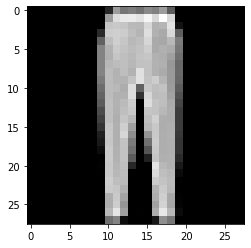

label: 1


In [25]:
# Dataset 를 통해 순회하기
# Dataloader에 데이터셋을 불러온 뒤에는 필요에 따라 데이터셋을 순회할 수 있다. 
# 각 순회는 (각각 배치 사이즈의 특징과 정답을 포함하는) train_features와 train_labels의 묶음을 반환. 
# shufflr=True로 지정했으므로, 모든 배치를 순회한 뒤 데이터가 섞임.
# 이미지와 정답 표시
train_features, train_labels = next(iter(train_dataloader))
print(f'Feature batch shzpe: {train_features.size()}')
print(f'Label batch shape: {train_labels.size()}')
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap='gray')
plt.show()
print(f'label: {label}')